# cosine similarity


In [1]:
import numpy as np
import pandas as pd

from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import re

from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# import plotting libraries
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import normalize

## what is Cosine Similarity

- In practice, cosine similarity tends to be useful when trying to determine how similar two texts/documents are. 

- used for sentiment analysis, translation, for detecting plagiarism. 

- Cosine similarity works in these usecases because we ignore magnitude and focus solely on orientation. when the magnitude of the vectors does not matter. 

- In NLP, this might help us still detect that a much longer document has the same “theme” as a much shorter document since we don’t worry about the magnitude or the “length” of the documents themselves.


- Intuitively, let’s say we have 2 vectors, each representing a sentence. If the vectors are close to parallel, maybe we assume that both sentences are “similar” in theme. Whereas if the vectors are orthogonal, then we assume the sentences are independent or NOT “similar”. 

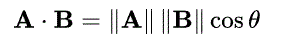

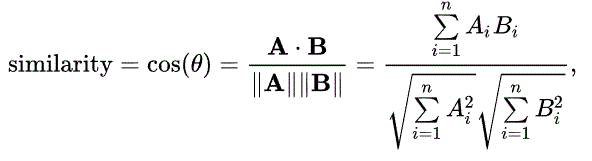

The resulting similarity ranges from 

- −1 meaning exactly opposite, 
-  1 meaning exactly the same, 
-  0 indicating orthogonality or decorrelation, 
- while in-between values indicate intermediate similarity or dissimilarity.

For __text matching__, the attribute vectors A and B are usually the term frequency vectors of the documents. Cosine similarity can be seen as a method of normalizing document length during comparison.

In the case of __information retrieval__, the cosine similarity of two documents will range from 0 to 1, since the term frequencies (using tf–idf weights) cannot be negative. The angle between two term frequency vectors cannot be greater than 90°.

In [3]:
# vectors
a = np.array([1,  2,  3])
b = np.array([10, 10, 40])

In [4]:
# method - 1 - using scipy
distance.cosine(a, b)

0.05508881747693195

In [5]:
# method - 2 - using numpy
# manually compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is 0.944911182523068
Cosine distance   is 0.05508881747693195


In [5]:
# Method 3
# define own cosine function
def compute_cosine(a, b):
    result_num = np.dot(a, b)
    result_den = np.sqrt(np.sum(a **2)) * np.sqrt(np.sum(b ** 2))
    
    return result_num / result_den

cos = compute_cosine(a, b)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is 0.944911182523068
Cosine distance   is 0.05508881747693195


# When to use the cosine similarity?

In [7]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


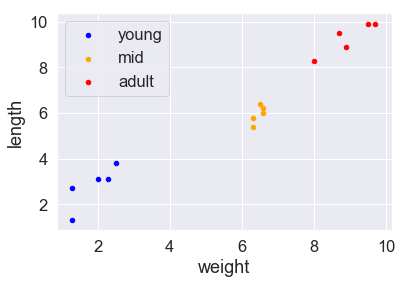

In [8]:

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue',   label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid',   ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red',    label='adult', ax=ax)

ax;

Looking at the plot above, we can see that the 3 classes are pretty well distinguishable by these 2 features that we have. 

Say that we apply k-NN to our data that will learn to classify new instances based on their distance to our known instances (and their labels). 

The algorithm needs a distance metric to determine which of the known instances are closest to the new one. 

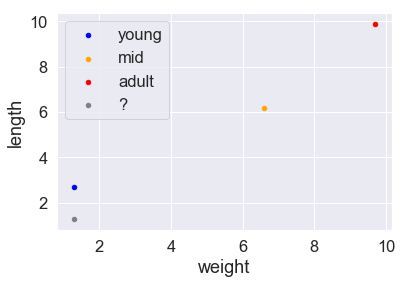

In [9]:
# Considering instance #0, #1, and #4 to be our known instances, we assume that we don’t know 
# the label of #14. 
# Plotting this will look as follows:

df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue',   label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid',   ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red',    label='adult', ax=ax)

ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)

#### Euclidean
Our euclidean distance function can be defined as follows:

$$ \Large \sqrt{\sum^n_{i=1} (x_i - y_i)^2} $$

In [10]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [11]:
X[1][:-1]

array([9.7, 9.9])

In [12]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]

x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [13]:
print("x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


According to euclidean distance, instance #14 is closest to #4. Our 4th instance had the label:

0 = young, which is what we would visually also deem the correct label for this instance.

In [8]:
X[4]

array([1.3, 2.7, 0. ])

#### Cosine
Our cosine similarity function can be defined as follows:

$$ \Large \frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}} $$

Where x and y are two vectors

In [14]:
def fn_cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [15]:
print(" x14 and x0:", fn_cosine_similarity(x14, x0), "\n",
      "x14 and x1:",  fn_cosine_similarity(x14, x1), "\n",
      "x14 and x4:",  fn_cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label:

2 = adult, which is definitely NOT correct!

In [16]:
X[1]

array([9.7, 9.9, 2. ])

#### So what is the deal here ??

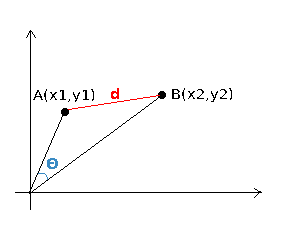

- visual representation of euclidean distance (d) and cosine similarity (θ)
- cosine looks at the angle between vectors (thus not taking into regard their weight or magnitude) 
- euclidean distance is similar to using a ruler to actually measure the distance. 

In our example the angle between x14 and x4 was larger than those of the other vectors, even though they were further away.

In [11]:
print(x0 , x1 , x4 , x14 )

[6.6 6.2] [9.7 9.9] [1.3 2.7] [1.3 1.3]


(0, 12)

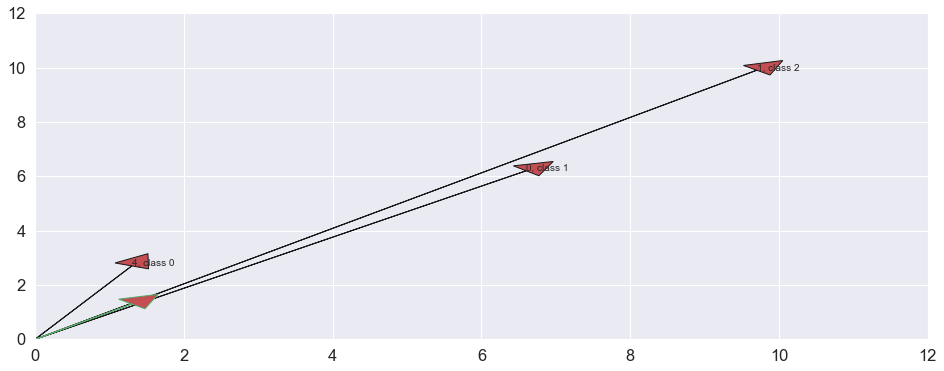

In [17]:
plt.figure(figsize=(16, 6))
plt.arrow(0, 0, x0[0], x0[1], head_width = .5,  head_length= .5, fc='r', ec='k')
plt.annotate('0, class 1 ', xy=(x0[0], x0[1]), xytext=(x0[0],x0[1]))

plt.arrow(0, 0, x1[0], x1[1], head_width = .5,  head_length= .5, fc='r', ec='k')
plt.annotate('1, class 2 ', xy=(x1[0], x1[1]), xytext=(x1[0],x1[1]))

plt.arrow(0, 0, x4[0], x4[1], head_width = .5,  head_length= .5, fc='r', ec='k')
plt.annotate('4, class 0 ', xy=(x4[0], x4[1]), xytext=(x4[0],x4[1]))

plt.arrow(0, 0, x14[0], x14[1], head_width = .5,  head_length= .5, fc='r', ec='g')

plt.xlim(0, 12)
plt.ylim(0, 12)

In [72]:
# the 3 training and 1 test points
df.iloc[[0, 1, 4, 14]]

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
4,1.3,2.7,0.0
14,1.3,1.3,0.0


# How do Euclidean Distance and Cosine Similarity Relate?

In [75]:
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t" , fn_cosine_similarity(x0, x1))

vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556


Cosine similarity takes a unit length vector to calculate dot products. However, what happens if we do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)?

we will do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)

$$ L_1 = \sum_i x_i $$

or the $ L_2 $ norm

$$ L_2 = \sqrt{\sum_i x_i^2 } $$

In [74]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

We will divide the values of our vector by these norms to get a normalized vector.

Applying the L1 norm to our vectors will make them sum up to 1 respectively, as such:

In [75]:
x0_n = l1_normalize(x0)
x1_n = l1_normalize(x1)
print(x0_n, x1_n)

[0.515625 0.484375] [0.49489796 0.50510204]


In [147]:
print("vectors \t", x0_n, x1_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x1_n), "\n"
      "cosine \t\t", fn_cosine_similarity(x0_n, x1_n))

vectors 	 [0.515625 0.484375] [0.49489796 0.50510204] 
euclidean 	 0.029312462230309616 
cosine 		 0.9991413385403558


before, the distance was pretty big, but the cosine similarity very high. Now that we normalized our vectors, it turns out that the distance is now very small

let us try vector 4, Unnormalized:


In [149]:
print("vectors \t", x0, x4, "\n"
      "euclidean \t", euclidean_distance(x0, x4), "\n"
      "cosine \t\t", fn_cosine_similarity(x0, x4))

# Normalized:

x4_n = l1_normalize(x4)

print("vectors \t", x0_n, x4_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x4_n), "\n"
      "cosine \t\t",  fn_cosine_similarity(x0_n, x4_n))

vectors 	 [6.6 6.2] [1.3 2.7] 
euclidean 	 6.351377803280167 
cosine 		 0.9330794115892785
vectors 	 [0.515625 0.484375] [0.325 0.675] 
euclidean 	 0.26958446032737116 
cosine 		 0.9330794115892785


Notice that because the cosine similarity is a bit lower between x0 and x4 than it was for x0 and x1, the euclidean distance is now also a bit larger.


let’s construct a vector that is almost evenly distant in our euclidean space, but where the cosine similarity is much lower

In [150]:
x00 = np.array([0.1, 6])

print("vectors \t", x0, x00, "\n"
      "euclidean \t", euclidean_distance(x0, x00), "\n"
      "cosine \t\t", fn_cosine_similarity(x0, x00))

vectors 	 [6.6 6.2] [0.1 6. ] 
euclidean 	 6.503076195155644 
cosine 		 0.696726168727881


In [151]:
x00_n = l1_normalize(x00)

print("vectors \t", x0_n, x00_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x00_n), "\n"
      "cosine \t\t", fn_cosine_similarity(x0_n, x00_n))

vectors 	 [0.515625 0.484375] [0.01639344 0.98360656] 
euclidean 	 0.7060200392072649 
cosine 		 0.6967261687278811


# when is cosine handy?

Let’s consider 4 articles from Wikipedia. We use the Wikipedia API to extract them, after which we can access their text with the .content method.

** pip install wikipedia **

Wikipedia is a Python library that makes it easy to access and parse data from Wikipedia.

Search Wikipedia, get article summaries, get data like links and images from a page, and more. 

In [18]:
import wikipedia

In [19]:
q1 = wikipedia.page('Machine Learning')
q2 = wikipedia.page('Artifical Intelligence')
q3 = wikipedia.page('Soccer')
q4 = wikipedia.page('Tennis')

In [20]:
print("ML \t", len(q1.content.split()), "\n"
      "AI \t", len(q2.content.split()), "\n"
      "soccer \t", len(q3.content.split()), "\n"
      "tennis \t", len(q4.content.split()))

ML 	 6332 
AI 	 14830 
soccer 	 6835 
tennis 	 11007


AI is a much larger article than Machine Learning (ML). 

This would mean that if we do not normalize our vectors, AI will be much further away from ML just because it has many more words. 

ML will probably be closer to an article with less words.

In [21]:
cv = CountVectorizer()

In [22]:
cv = cv.fit(([q1.content, 
              q2.content, 
              q3.content, 
              q4.content]))

len(cv.get_feature_names())

5825

In [23]:
X = cv.transform([q1.content, 
                           q2.content, 
                           q3.content, 
                           q4.content]).toarray()

In [24]:
X

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  2,  0,  0],
       [ 2,  0,  1, ...,  0,  0,  1],
       [12,  1,  0, ...,  0,  1,  0]], dtype=int64)

In [25]:
print("ML - AI \t", euclidean_distance(X[0], X[1]), "\n"
      "ML - soccer \t", euclidean_distance(X[0], X[2]), "\n"
      "ML - tennis \t", euclidean_distance(X[0], X[3]))

ML - AI 	 794.8899294870957 
ML - soccer 	 457.0262574513635 
ML - tennis 	 790.3480246068816


ML seems to be closest to soccer, which doesn’t make a lot of sense intuitively. 

So, what happens if we look at cosine similairty (thus normalising our vectors)?

In [27]:
print("ML - AI \t", fn_cosine_similarity(X[0], X[1]), "\n"
      "ML - soccer \t", fn_cosine_similarity(X[0], X[2]), "\n"
      "ML - tennis \t", fn_cosine_similarity(X[0], X[3]))

ML - AI 	 0.8965381343882575 
ML - soccer 	 0.8012455133876663 
ML - tennis 	 0.8125029759237865


ML is closer to AI! Granted, it still seems pretty close to soccer an tennis judging from these scores, but please note that word frequency is not that great of a representation for texts with such rich content.

# Categorize a Tweet

In [28]:
ml_tweet = "New research release: overcoming many of Reinforcement Learning's limitations with Evolution Strategies."

In [29]:
x = np.array(cv.transform([ml_tweet]).todense())[0]

In [30]:
print("tweet - ML \t", euclidean_distance(x[0], X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x[0], X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x[0], X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x[0], X[3]))

tweet - ML 	 582.6027806318813 
tweet - AI 	 1274.1554065340695 
tweet - soccer 	 762.3693330663294 
tweet - tennis 	 1187.0189551982733


Well, that worked out pretty well at first glance, it’s closest to ML. However, see how it’s also closer to soccer than AI? 

In [31]:
print("tweet - ML \t", fn_cosine_similarity(x, X[0]), "\n"
      "tweet - AI \t", fn_cosine_similarity(x, X[1]), "\n"
      "tweet - soccer \t", fn_cosine_similarity(x, X[2]), "\n"
      "tweet - tennis \t", fn_cosine_similarity(x, X[3]))

tweet - ML 	 0.24696695299258176 
tweet - AI 	 0.1925924774722562 
tweet - soccer 	 0.11904645807537512 
tweet - tennis 	 0.11295571330513689


In [32]:
so_tweet = "#LegendsDownUnder The Reds are out for the warm up at the @nibStadium. Not long now until kick-off in Perth."

In [168]:
x2 = np.array(cv.transform([so_tweet]).todense())[0]

In [169]:
print("tweet - ML \t", euclidean_distance(x2, X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x2, X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x2, X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x2, X[3]))

tweet - ML 	 517.7644251974058 
tweet - AI 	 1205.3667491680696 
tweet - soccer 	 735.5528533015149 
tweet - tennis 	 1076.8133543005492


In [170]:
print("tweet - ML \t", fn_cosine_similarity(x2, X[0]), "\n"
      "tweet - AI \t", fn_cosine_similarity(x2, X[1]), "\n"
      "tweet - soccer \t", fn_cosine_similarity(x2, X[2]), "\n"
      "tweet - tennis \t", fn_cosine_similarity(x2, X[3]))

tweet - ML 	 0.46541353104914085 
tweet - AI 	 0.46417194656702776 
tweet - soccer 	 0.6095142097107774 
tweet - tennis 	 0.5989515638500108


# Hamming distance

Compute the Hamming distance between two 1-D arrays.

The Hamming distance between 1-D arrays u and v, is simply the proportion of disagreeing components in u and v.

In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other.

In [3]:
data_dict = {'num_doors':   pd.Series(data= [2, 4, 2, 2]),
             'num_cyl':     pd.Series(data= [2, 3, 4, 8]),
             'cruise_ctrl': pd.Series(data= [0, 0, 1, 1]),
             'price_cat':   pd.Series(data= [1, 2, 2, 4])
            }

In [4]:
df = pd.DataFrame(data_dict)
df

,cruise_ctrl,num_cyl,num_doors,price_cat
0,0,2,2,1
1,0,3,4,2
2,1,4,2,2
3,1,8,2,4


In [10]:
a = df.iloc[1].values
b = df.iloc[2].values

In [11]:
a

array([0, 3, 4, 2], dtype=int64)

In [13]:
distance.hamming(a, b)

0.75

# scipy.spatial.distance.braycurtis - Dissimilarity

For a simple example, consider two aquariums;

Tank one: 6 goldfish, 7 guppies and 4 rainbow fish,
Tank two: 10 goldfish           and 6 rainbow fish.


To calculate Bray-Curtis,
- let’s first calculate Cij (the sum of only the lesser counts for each species found in both sites). 
- Goldfish are found on both sites; the lesser count is 6. 
- Guppies are only on one site, so they can’t be added in here. 
- Rainbow fish, though, are on both, and the lesser count is 4.

So Cij = 6 + 4 = 10.

Si (total number of specimens counted on site i) = 6 + 7 + 4 = 17, and
Sj (total number of specimens counted on site j) = 10 + 6 = 16.

So our BCij = 1 – (2 * 10) / (17 + 16), or 0.39.

** interpretation **

The Bray-Curtis dissimilarity is always a number between 0 and 1. 
- If 0, the two sites share all the same species; 
- if 1, they don’t share any species.

** Assumptions **

To calculate the Bray-Curtis dissimilarity between two sites you must assume that both sites are the same size, either in area or volume (as is relevant to species counts). 

This is because the equation doesn’t include any notion of space; it works only with the counts themselves.

If the two sites are not the same size, you will need to adjust your counts before doing the Bray-Curtis calculation.


[1, 0, 0]
[0, 1, 0]



 $ s = 1 - \frac{|p - q|}{n - 1}$

# Locality Sensitive Hashing 

pip install LocalitySensitiveHashing

A Python implementation of Locality Sensitive Hashing for finding nearest neighbors and clusters in multidimensional numerical data

- Locality Sensitive Hashing (LSH) is a computationally efficient approach for finding nearest neighbors in large datasets. 

- The main idea in LSH is to avoid having to compare every pair of data samples in a large dataset in order to find the nearest similar neighbors for the different data samples. 

- With LSH, one can expect a data sample and its closest similar neighbors to be hashed into the same bucket with a high probability. 

- By treating the data samples placed in the same bucket as candidates for similarity checking, we significantly reduce the computational burden associated with similarity detection in large datasets.

- While LSH algorithms have traditionally been used for finding nearest neighbors, this module goes a step further and explores using LSH for clustering the data. 

- Strictly speaking, this violates the basic mandate of LSH, which is to return just the nearest neighbors. (A data sample X being Y’s nearest neighbor and Y being Z’s nearest neighbor, in the sense neighbors are commonly defined with the Cosine metric in LSH, does not imply that X and Z will always be sufficiently close to be considered each other’s nearest neighbors.) 

- Random hyper-planes $h_1, h_2,...h_k$

- space sliced into $2^k regions (ploytopes) $

- compare x only to training points in the same region

- Complexity : O(kd + dn/$2^k$) = O(d.log(n)) vs O(dn)

- missed neighbors
    - repeat with different $h_1, h_2,...h_k$
